In [1]:
from pathlib import Path

import util
from util import p_, workflow

import automech

file = util.notebook_file() if util.is_notebook() else __file__
tag = util.file_tag(file)
root_path = Path("..")
par_mech = workflow.read_parent_mechanism(root_path=root_path)

In [ ]:
# Generate submechanism
sub_tags = [
    "A_rh-oh_1e-1_v0",
    # "A_rh-oh_1e-2_v0",
    "A_rh-oh_2x_v0",
    "B_rh-ho2_1e-1_v0",
    "B_rh-ho2_1e-2_v0",
    "B_rh-ho2_2x_v0",
    "C_r_1e_v0",
    "C_r_2x_v0",
    "C_r_3o_v0",
    "D_r-o2_0a_v0",
    "D_r-o2_0a_v1",
    "D_r-o2_1e_v0",
    "D_r-o2_1e_v1",
    "D_r-o2_2x_v0",
    "D_r-o2_3o_v0",
]
sub_paths = [p_.generated_mechanism(t, "json", p_.data(root_path)) for t in sub_tags]
sub_mechs = [automech.io.read(p) for p in sub_paths]
gen_mech = automech.combine_all(sub_mechs)
gen_mech = automech.drop_duplicate_reactions(gen_mech)
automech.display(gen_mech)

In [ ]:
# Prepare calculation
workflow.prepare_calculation(mech=gen_mech, tag=tag, root_path=root_path)


Finalizing build for...
reactions=shape: (50, 5)
┌────────────────────────┬────────────────────────┬───────────┬────────────┬───────────────────────┐
│ reactants              ┆ products               ┆ formula   ┆ reversible ┆ rate                  │
│ ---                    ┆ ---                    ┆ ---       ┆ ---        ┆ ---                   │
│ list[str]              ┆ list[str]              ┆ struct[3] ┆ bool       ┆ struct[18]            │
╞════════════════════════╪════════════════════════╪═══════════╪════════════╪═══════════════════════╡
│ ["C5H8O(825)",         ┆ ["S(1289)", "H2O(5)"]  ┆ {5,9,2}   ┆ null       ┆ null                  │
│ "OH(4)"]               ┆                        ┆           ┆            ┆                       │
│ ["C5H8O(825)",         ┆ ["C5H7O(758)",         ┆ {5,9,2}   ┆ true       ┆ {2,{null,null,null,nu │
│ "OH(4)"]               ┆ "H2O(5)"]              ┆           ┆            ┆ ll,null,n…            │
│ ["C5H8O(825)",         ┆ ["S(1314)", "H

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


Writing mechanism...
../data/Y_3a_v0_gen.json
../data/Y_3a_v0_ste.json
../data/mechanalyzer/Y_3a_v0_ste.dat
../data/mechanalyzer/Y_3a_v0_ste.csv


  0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/95 [00:00<?, ?it/s]


Stereoexpansion errors:


In [4]:
# Gather statistics
workflow.gather_statistics(tag=tag, root_path=root_path)

New species and reactions:

SPECIES

C5O2qarhfr  ! SMILES: C=CCC[CH]OO     AMChI: AMChI=1/C5H9O2/c1-2-4-5-3-7-6/h2-3,6H,1,4-5H2
C5H6alwnib  ! SMILES: C=1=CCCC=1      AMChI: AMChI=1/C5H6/c1-2-4-5-3-1/h2-3H,4-5H2
C5O2pkpfsd  ! SMILES: [CH]=CC(C=C)OO  AMChI: AMChI=1/C5H7O2/c1-3-5(4-2)7-6/h1,3-6H,2H2
C5O2nexamm  ! SMILES: C=C[CH]C=COO    AMChI: AMChI=1/C5H7O2/c1-2-3-4-5-7-6/h2-6H,1H2
C5O2sidwao  ! SMILES: [CH]=CCC=COO    AMChI: AMChI=1/C5H7O2/c1-2-5-3-4-7-6/h1-4,6H,5H2
C5Oqidgnv   ! SMILES: C1=CC2CC1O2     AMChI: AMChI=1/C5H6O/c1-2-5-3-4(1)6-5/h1-2,4-5H,3H2

END


REACTIONS    CAL/MOL   MOL

C5H8O(825) + OH(4) = S(1289) + H2O(5)                   1.000      0.000      0.000
C5H8O(825) + OH(4) = S(1314) + H2O(5)                   1.000      0.000      0.000
C5H8(522) + OH(4) = C5H7(1202) + H2O(5)                 1.000      0.000      0.000
C5H8(522) + HO2(8) = C5H7(1202) + H2O2(10)              1.000      0.000      0.000
C5H8O(825) + HO2(8) = S(1289) + H2O2(10)                1.000      0.

In [8]:
#   - Read in expanded mechanism
gen_path = p_.generated_mechanism(tag, ext="json", path=p_.data(root_path))
gen_mech = automech.io.read(gen_path)

eqs = [
    "C5H8O(825) + OH(4) = S(1289) + H2O(5)",
    "C5H8O(825) + OH(4) = S(1314) + H2O(5)",
    "C5H8(522) + OH(4) = C5H7(1202) + H2O(5)",
    "C5H8(522) + HO2(8) = C5H7(1202) + H2O2(10)",
    "C5H8O(825) + HO2(8) = S(1289) + H2O2(10)",
    "S(725) = C5O2qarhfr",
    "S(1209) = C5O2sidwao",
    "S(1210) = C5O2nexamm",
    "S(1210) = C5Oqidgnv + OH(4)",
    "S(1209) = C5O2pkpfsd",
]

automech.display_reactions(gen_mech, eqs=eqs)


*********
Reaction: C5H8O(825) + OH(4) = S(1289) + H2O(5)
Translations:
  smiles:
    reactants = ['O1C2C1CCC2', '[OH]']
    products = ['O1C2C1C[CH]C2', 'O']
Rate parameters:
  This work:
    C5H8O(825) + OH(4) = S(1289) + H2O(5)                        1.000      0.000      0.000


alt.Chart(...)


*********
Reaction: C5H8O(825) + OH(4) = S(1314) + H2O(5)
Translations:
  smiles:
    reactants = ['O1C2C1CCC2', '[OH]']
    products = ['O1C2CCC[C]12', 'O']
Rate parameters:
  This work:
    C5H8O(825) + OH(4) = S(1314) + H2O(5)                        1.000      0.000      0.000


alt.Chart(...)


*********
Reaction: C5H8(522) + OH(4) = C5H7(1202) + H2O(5)
Translations:
  smiles:
    reactants = ['C1CC=CC1', '[OH]']
    products = ['C1CC=[C]C1', 'O']
Rate parameters:
  This work:
    C5H8(522) + OH(4) = C5H7(1202) + H2O(5)                      1.000      0.000      0.000


alt.Chart(...)


*********
Reaction: C5H8(522) + HO2(8) = C5H7(1202) + H2O2(10)
Translations:
  smiles:
    reactants = ['C1CC=CC1', 'O[O]']
    products = ['C1CC=[C]C1', 'OO']
Rate parameters:
  This work:
    C5H8(522) + HO2(8) = C5H7(1202) + H2O2(10)                   1.000      0.000      0.000


alt.Chart(...)


*********
Reaction: C5H8O(825) + HO2(8) = S(1289) + H2O2(10)
Translations:
  smiles:
    reactants = ['O1C2C1CCC2', 'O[O]']
    products = ['O1C2C1C[CH]C2', 'OO']
Rate parameters:
  This work:
    C5H8O(825) + HO2(8) = S(1289) + H2O2(10)                     1.000      0.000      0.000


alt.Chart(...)


*********
Reaction: S(725) = C5O2qarhfr
Translations:
  smiles:
    reactants = ['OOC1CC[CH]C1']
    products = ['C=CCC[CH]OO']
Rate parameters:
  This work:
    S(725) = C5O2qarhfr                                          1.000      0.000      0.000


alt.Chart(...)


*********
Reaction: S(1209) = C5O2sidwao
Translations:
  smiles:
    reactants = ['OOC1[CH]CC=C1']
    products = ['[CH]=CCC=COO']
Rate parameters:
  This work:
    S(1209) = C5O2sidwao                                         1.000      0.000      0.000


alt.Chart(...)


*********
Reaction: S(1210) = C5O2nexamm
Translations:
  smiles:
    reactants = ['OOC1CC=C[CH]1']
    products = ['C=C[CH]C=COO']
Rate parameters:
  This work:
    S(1210) = C5O2nexamm                                         1.000      0.000      0.000


alt.Chart(...)


*********
Reaction: S(1210) = C5Oqidgnv + OH(4)
Translations:
  smiles:
    reactants = ['OOC1CC=C[CH]1']
    products = ['C1=CC2CC1O2', '[OH]']
Rate parameters:
  This work:
    S(1210) = C5Oqidgnv + OH(4)                                  1.000      0.000      0.000


alt.Chart(...)


*********
Reaction: S(1209) = C5O2pkpfsd
Translations:
  smiles:
    reactants = ['OOC1[CH]CC=C1']
    products = ['[CH]=CC(C=C)OO']
Rate parameters:
  This work:
    S(1209) = C5O2pkpfsd                                         1.000      0.000      0.000


alt.Chart(...)

name: C5O2qarhfr
smiles: C=CCC[CH]OO


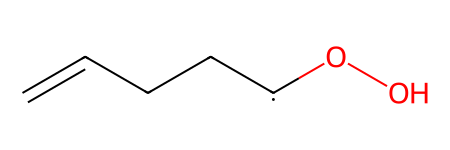

name: C5H6alwnib
smiles: C=1=CCCC=1


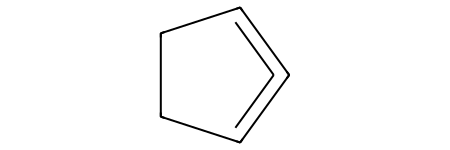

name: C5O2pkpfsd
smiles: [CH]=CC(C=C)OO


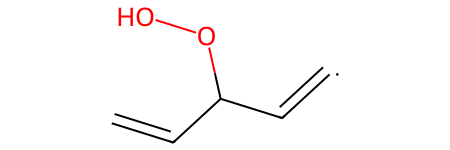

name: C5O2nexamm
smiles: C=C[CH]C=COO


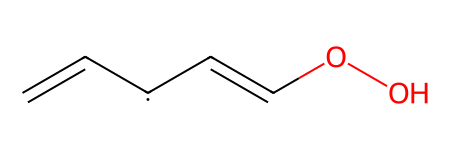

name: C5O2sidwao
smiles: [CH]=CCC=COO


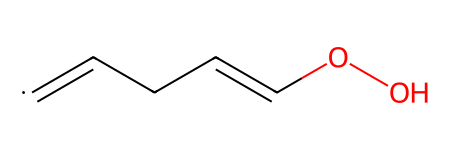

name: C5Oqidgnv
smiles: C1=CC2CC1O2


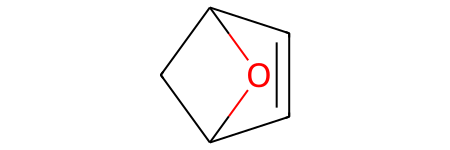

In [9]:
names = [
    "C5O2qarhfr",
    "C5H6alwnib",
    "C5O2pkpfsd",
    "C5O2nexamm",
    "C5O2sidwao",
    "C5Oqidgnv",
]

automech.display_species(gen_mech, spc_vals_=names)

In [5]:
# # Prepare simulation
# workflow.prepare_simulation(tag=tag, root_path=root_path)
# workflow.prepare_simulation_species(tag=tag, root_path=root_path)

In [6]:
# # Check rates
# workflow.plot_rates(tag=tag, root_path=root_path)

In [7]:
# # Plot simulation
# chart_dct = workflow.plot_simulation(
#     tag=tag,
#     x_col="O2_molecules",
#     root_path=root_path,
#     line_source_=["Hill", "Lokachari"],
#     point_source="Experiment",
#     control=False,
# )
# mech = automech.io.read(
#     p_.full_calculated_mechanism(tag, "json", path=p_.data(root_path))
# )
# for name, chart in chart_dct.items():
#     automech.display_species(mech, [name])
#     chart.show()